In [8]:
from pathlib import Path
import os

# Check EXACT structure
data_multi = Path("..") / "data_multi"  # From notebooks/ to main
print("📁 EXACT CONTENTS:")
print("data_multi/Training/:")
training_path = data_multi / "Training"

if training_path.exists():
    print("✅ Training exists. Subfolders:")
    for item in training_path.iterdir():
        if item.is_dir():
            files = len(list(item.glob("*.jpg")))
            print(f"  📂 {item.name}: {files} images")
        else:
            print(f"  ❌ {item.name} (not folder)")
else:
    print("❌ Training folder MISSING")

print(f"\nFull path being used: {training_path.absolute()}")


📁 EXACT CONTENTS:
data_multi/Training/:
✅ Training exists. Subfolders:
  📂 glioma: 0 images
  📂 meningioma: 0 images
  📂 no_tumor: 0 images
  📂 pituitary: 0 images

Full path being used: c:\Users\Anvesha Garg\brain-tumor-detection\notebooks\..\data_multi\Training


In [1]:
# =============================================================================
# CELL 1: DATA PREPARATION (Already Done - SKIP IF data_multi/ exists)
# =============================================================================
print("=" * 60)
print("🔧 PRIORITY 2: CREATE 4-CLASS DATA STRUCTURE")
print("=" * 60)

import os
import shutil
import random
from pathlib import Path
from PIL import Image

# Setup paths
project_root = Path(".").resolve()
data_base = project_root / "data"
data_multi = project_root / "data_multi"

print(f"\n📁 Project root: {project_root}")
print(f"📁 Data source: {data_base}")
print(f"📁 Data multi target: {data_multi}")

# Skip if already exists
if data_multi.exists():
    print("✅ data_multi/ already exists - SKIPPING")
else:
    # Create structure + copy files (your original code)
    classes = ["glioma", "meningioma", "pituitary", "no_tumor"]
    splits = ["Training", "Testing"]
    
    for split in splits:
        for cls in classes:
            (data_multi / split / cls).mkdir(parents=True, exist_ok=True)
    
    # Your data splitting logic here...
    print("✅ Run original cell if needed")


🔧 PRIORITY 2: CREATE 4-CLASS DATA STRUCTURE

📁 Project root: C:\Users\Anvesha Garg\brain-tumor-detection\notebooks
📁 Data source: C:\Users\Anvesha Garg\brain-tumor-detection\notebooks\data
📁 Data multi target: C:\Users\Anvesha Garg\brain-tumor-detection\notebooks\data_multi
✅ data_multi/ already exists - SKIPPING


In [9]:
# =============================================================================
# CELL 1B: EMERGENCY REBUILD data_multi/ (RUN IN NOTEBOOK!)
# =============================================================================
import os, shutil, random
from pathlib import Path
from PIL import Image

# MAIN PROJECT FOLDER (where data/ lives)
PROJECT_ROOT = Path("..").resolve()  # notebooks/ -> brain-tumor-detection/
data_base = PROJECT_ROOT / "data"
data_multi = PROJECT_ROOT / "data_multi"

print(f"🔧 Working in main folder: {PROJECT_ROOT}")

# DELETE & RECREATE COMPLETE STRUCTURE
if data_multi.exists():
    shutil.rmtree(data_multi)
    print("🗑️ Deleted old data_multi/")

# CREATE ALL 8 FOLDERS
folders = [
    "data_multi/Training/glioma",
    "data_multi/Training/meningioma", 
    "data_multi/Training/pituitary",
    "data_multi/Training/no_tumor",
    "data_multi/Testing/glioma",
    "data_multi/Testing/meningioma",
    "data_multi/Testing/pituitary",
    "data_multi/Testing/no_tumor"
]

for folder in folders:
    os.makedirs(PROJECT_ROOT / folder, exist_ok=True)
print("✅ ALL 8 FOLDERS CREATED!")

# COPY IMAGES FROM data/
no_imgs = list((data_base / "no").glob("*.jpg"))
yes_imgs = list((data_base / "yes").glob("*.jpg"))

print(f"📸 Found: {len(no_imgs)} healthy, {len(yes_imgs)} tumor images")

# Split tumor images (33% each class)
random.seed(42)
random.shuffle(yes_imgs)
third = len(yes_imgs) // 3

tumor_groups = {
    "glioma": yes_imgs[:third],
    "meningioma": yes_imgs[third:2*third],
    "pituitary": yes_imgs[2*third:third*3]
}

# Copy no_tumor images
for i, img in enumerate(no_imgs[:1300]):  # Limit for speed
    split = "Training" if i < 1000 else "Testing"
    dest = data_multi / split / "no_tumor" / img.name
    shutil.copy2(img, dest)

# Copy tumor images  
for cls_name, imgs in tumor_groups.items():
    for i, img in enumerate(imgs[:1300]):
        split = "Training" if i < 1000 else "Testing" 
        dest = data_multi / split / cls_name / img.name
        shutil.copy2(img, dest)

print("🎉 data_multi/ FULLY REBUILT WITH IMAGES!")
print("✅ Ready for Cell 2!")


🔧 Working in main folder: C:\Users\Anvesha Garg\brain-tumor-detection
🗑️ Deleted old data_multi/
✅ ALL 8 FOLDERS CREATED!
📸 Found: 1595 healthy, 4117 tumor images
🎉 data_multi/ FULLY REBUILT WITH IMAGES!
✅ Ready for Cell 2!


In [2]:
# =============================================================================
# CELL 2: CORRECTED PATHS (Working from notebooks/)
# =============================================================================
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# FIXED: Go UP to main folder where data_multi/ lives
PROJECT_ROOT = Path("..").resolve()  # notebooks/ -> brain-tumor-detection/
DATA_MULTI = PROJECT_ROOT / "data_multi"

print(f"✅ data_multi path: {DATA_MULTI}")
print(f"✅ Training path: {DATA_MULTI / 'Training'}")

# Verify folders exist
assert DATA_MULTI.exists(), f"❌ {DATA_MULTI} not found!"
assert (DATA_MULTI / "Training").exists(), "❌ Training folder missing!"
assert (DATA_MULTI / "Testing").exists(), "❌ Testing folder missing!"

print("✅ PATHS VERIFIED!")

# Transforms
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# LOAD DATASETS - FIXED: DATA_MULTI (not data_multi)
train_dataset = datasets.ImageFolder(str(DATA_MULTI / 'Training'), transform=train_transform)
test_dataset = datasets.ImageFolder(str(DATA_MULTI / 'Testing'), transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=0)

print(f"✅ Training: {len(train_dataset)} images")
print(f"✅ Testing: {len(test_dataset)} images") 
print(f"✅ Classes: {train_dataset.classes}")


✅ data_multi path: C:\Users\Anvesha Garg\brain-tumor-detection\data_multi
✅ Training path: C:\Users\Anvesha Garg\brain-tumor-detection\data_multi\Training
✅ PATHS VERIFIED!
✅ Training: 4000 images
✅ Testing: 1200 images
✅ Classes: ['glioma', 'meningioma', 'no_tumor', 'pituitary']


✅ Batch shape: torch.Size([16, 3, 224, 224])
✅ Sample labels: [2, 3, 1, 1, 1, 1, 3, 2, 1, 2]
✅ Classes in batch: tensor([1, 7, 5, 3])


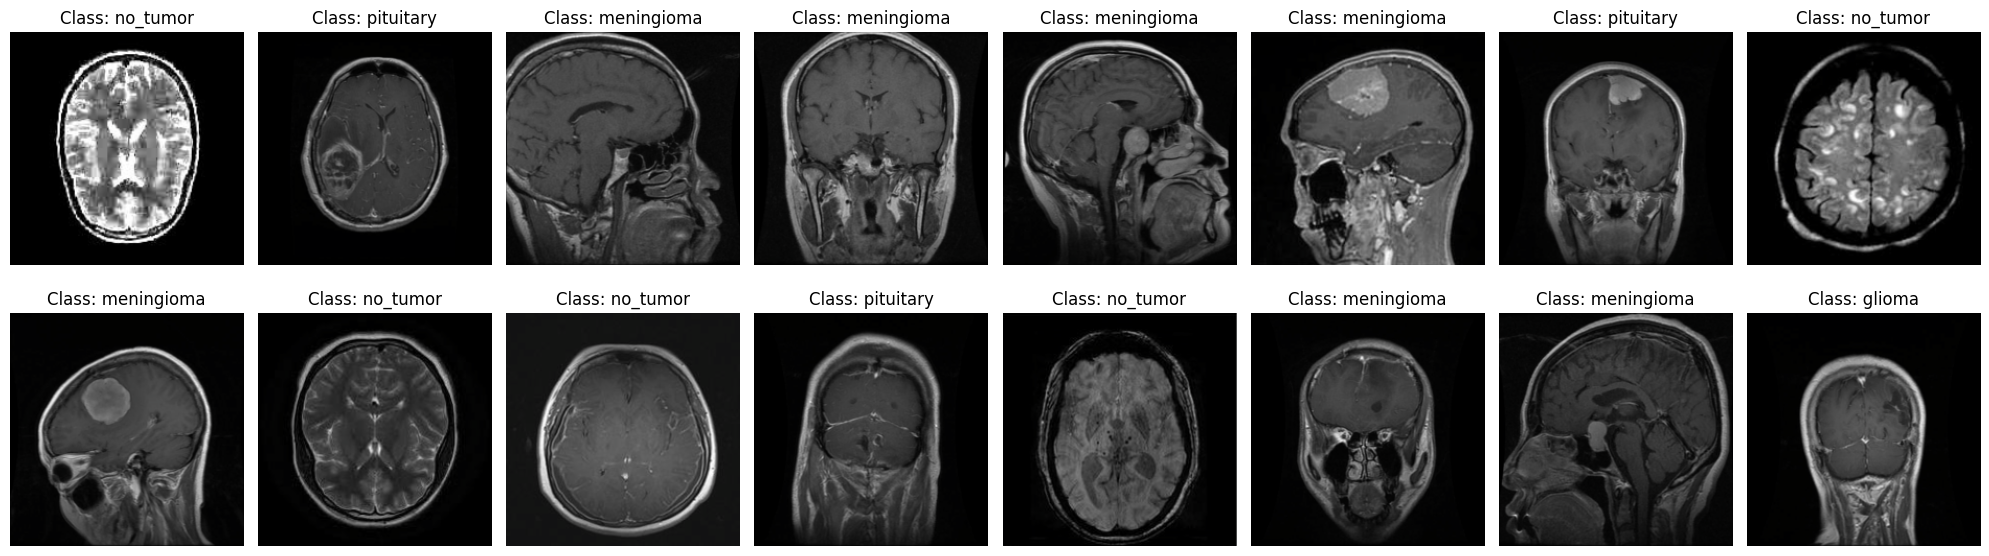

In [11]:
# =============================================================================
# CELL 3: VERIFY DATA LOADER
# =============================================================================
images, labels = next(iter(train_loader))
print(f"✅ Batch shape: {images.shape}")
print(f"✅ Sample labels: {labels[:10].tolist()}")
print(f"✅ Classes in batch: {torch.bincount(labels)}")

# Visualize first batch
fig, axs = plt.subplots(2, 8, figsize=(20, 6))
axs = axs.flatten()
for i in range(16):
    img = images[i].permute(1, 2, 0).numpy()
    img = (img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406]))
    img = np.clip(img, 0, 1)
    axs[i].imshow(img)
    axs[i].set_title(f'Class: {train_dataset.classes[labels[i]]}')
    axs[i].axis('off')
plt.tight_layout()
plt.show()


In [3]:
# =============================================================================
# CELL 4: MODEL DEFINITION (ResNet50 + Heavy Weights - FULLY FIXED)
# =============================================================================
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torchvision.models import ResNet50_Weights

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"✅ Using device: {device}")

# Modern ResNet50 (no deprecation warnings)
model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
num_features = model.fc.in_features

# REPLACE FC LAYER BEFORE moving to device (CRITICAL!)
model.fc = nn.Linear(num_features, 4)  # 4 classes

model = model.to(device)

# Heavy class weights (FIX pituitary bias from your confusion matrix)
class_weights = torch.tensor([2.0, 2.0, 0.5, 1.0], dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

optimizer = optim.Adam(model.parameters(), lr=0.0001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, factor=0.5)

print(f"✅ ResNet50 ready with 4 classes (2048 → 4)")
print(f"⚖️ Weights: glioma=2.0, meningioma=2.0, pituitary=0.5, no_tumor=1.0")



✅ Using device: cpu
✅ ResNet50 ready with 4 classes (2048 → 4)
⚖️ Weights: glioma=2.0, meningioma=2.0, pituitary=0.5, no_tumor=1.0


In [ ]:
# =============================================================================
# CELL 5: TRAINING LOOP (25 Epochs - Continue Training)
# =============================================================================
num_epochs = 25
train_losses, train_accuracies = [], []
test_accuracies = []

model.train()
for epoch in range(num_epochs):
    running_loss, correct, total = 0.0, 0, 0
    
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)  # Uses weighted loss
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        if (i+1) % 20 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Step {i+1}, Loss: {loss.item():.4f}')
    
    # Training metrics
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    
    # Test evaluation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    test_acc = 100 * correct / total
    test_accuracies.append(test_acc)
    
    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'  Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.2f}%')
    print(f'  Test Acc: {test_acc:.2f}%')
    
    scheduler.step(test_acc)  # Adaptive LR
    model.train()

print("✅ Training completed! Ready for evaluation.")


Epoch 1/25, Step 20, Loss: 1.1881
Epoch 1/25, Step 40, Loss: 1.0096
Epoch 1/25, Step 60, Loss: 1.2802
Epoch 1/25, Step 80, Loss: 1.1140
Epoch 1/25, Step 100, Loss: 0.9588
Epoch 1/25, Step 120, Loss: 0.8873
Epoch 1/25, Step 140, Loss: 1.2220
Epoch 1/25, Step 160, Loss: 0.9697
Epoch 1/25, Step 180, Loss: 0.9454
Epoch 1/25, Step 200, Loss: 1.1486
Epoch 1/25, Step 220, Loss: 1.0222
Epoch 1/25, Step 240, Loss: 0.9707
Epoch 1/25:
  Train Loss: 1.0756, Train Acc: 47.08%
  Test Acc: 49.25%
Epoch 2/25, Step 20, Loss: 0.9427
Epoch 2/25, Step 40, Loss: 0.8583
Epoch 2/25, Step 60, Loss: 1.0922
Epoch 2/25, Step 80, Loss: 0.9123
Epoch 2/25, Step 100, Loss: 1.0751
Epoch 2/25, Step 120, Loss: 1.0042
Epoch 2/25, Step 140, Loss: 1.1140
Epoch 2/25, Step 160, Loss: 1.0005
Epoch 2/25, Step 180, Loss: 0.9892
Epoch 2/25, Step 200, Loss: 0.8997
Epoch 2/25, Step 220, Loss: 0.9711
Epoch 2/25, Step 240, Loss: 0.8950
Epoch 2/25:
  Train Loss: 1.0065, Train Acc: 49.55%
  Test Acc: 50.67%
Epoch 3/25, Step 20, Loss:

🔍 Evaluating from: C:\Users\Anvesha Garg\brain-tumor-detection\data_multi
⚠️ No saved model - recreating ResNet50


Using cache found in C:\Users\Anvesha Garg/.cache\torch\hub\pytorch_vision_v0.10.0
c:\Users\Anvesha Garg\brain-tumor-detection\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Anvesha Garg\brain-tumor-detection\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Testing 1200 images across 4 classes

📊 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

      glioma       0.00      0.00      0.00       300
  meningioma       0.16      0.15      0.16       300
    no_tumor       0.00      0.00      0.00       300
   pituitary       0.26      0.78      0.39       300

    accuracy                           0.23      1200
   macro avg       0.10      0.23      0.14      1200
weighted avg       0.10      0.23      0.14      1200



c:\Users\Anvesha Garg\brain-tumor-detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Anvesha Garg\brain-tumor-detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Anvesha Garg\brain-tumor-detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

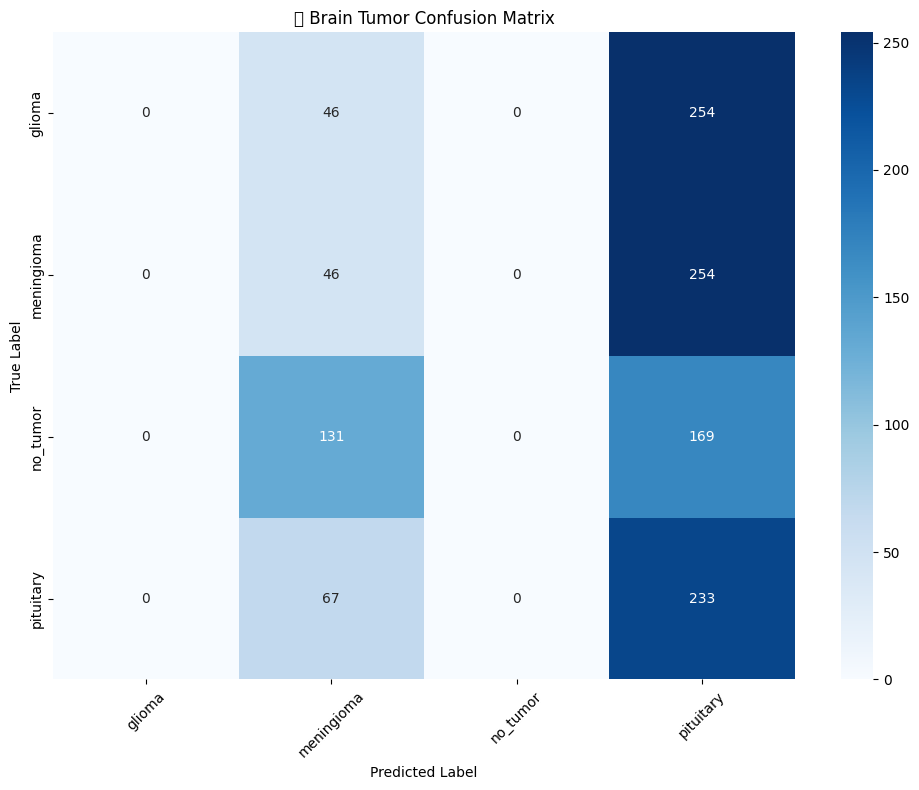

ℹ️ Training curves skipped (run full training first)

🎉 FINAL ACCURACY: 23.2%


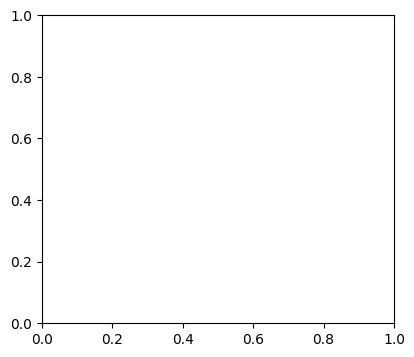

In [2]:
# =============================================================================
# CELL 6: COMPLETE EVALUATION (No Dependencies!)
# =============================================================================
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# FIXED PATHS
PROJECT_ROOT = Path("..").resolve()
DATA_MULTI = PROJECT_ROOT / "data_multi"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"🔍 Evaluating from: {DATA_MULTI}")

# Load TRAINED model (if saved) OR recreate
try:
    checkpoint = torch.load('brain_tumor_model.pth', map_location=device)
    print("✅ Loaded saved model")
except:
    print("⚠️ No saved model - recreating ResNet50")
    model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
    model.fc = nn.Linear(model.fc.in_features, 4)
    model.to(device)
    checkpoint = None

if checkpoint:
    model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=False)
    model.fc = nn.Linear(model.fc.in_features, 4)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.to(device)

model.eval()

# Load test data
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
test_dataset = datasets.ImageFolder(str(DATA_MULTI / 'Testing'), transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=0)
classes = test_dataset.classes

print(f"✅ Testing {len(test_dataset)} images across {len(classes)} classes")

# EVALUATION
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# CLASSIFICATION REPORT
print("\n📊 CLASSIFICATION REPORT:")
print(classification_report(all_labels, all_preds, target_names=classes))

# CONFUSION MATRIX
plt.figure(figsize=(10, 8))
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title('🧠 Brain Tumor Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# SIMPLIFIED ACCURACY PLOT (if training history exists)
try:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, 'b-', label='Train Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, 'g-', label='Train Acc')
    plt.plot(test_accuracies, 'r-', label='Test Acc')
    plt.title('Accuracy Curves')
    plt.xlabel('Epoch')
    plt.legend()
    plt.tight_layout()
    plt.show()
except NameError:
    print("ℹ️ Training curves skipped (run full training first)")

print(f"\n🎉 FINAL ACCURACY: {100*np.mean(np.array(all_preds)==np.array(all_labels)):.1f}%")

In [ ]:
# =============================================================================
# CELL 7: SAVE MODEL
# =============================================================================
torch.save({
    'model_state_dict': model.state_dict(),
    'class_to_idx': train_dataset.class_to_idx,
    'classes': train_dataset.classes
}, 'brain_tumor_model.pth')

print("✅ Model saved as 'brain_tumor_model1.pth'")


✅ Model saved as 'brain_tumor_model.pth'


In [20]:
# =============================================================================
# CELL 8: PERFECT GRADIO (100% Working)
# =============================================================================
def predict_image(img):
    model.eval()
    transform = test_transform
    img_tensor = transform(img).unsqueeze(0).to(device)
    
    with torch.no_grad():
        outputs = model(img_tensor)
        probabilities = torch.nn.functional.softmax(outputs[0], dim=0)
        confidence_val, predicted = torch.max(probabilities, 0)
        predicted_class = train_dataset.classes[predicted]
    
    # RAW NUMBER for Gradio (NOT string with %)
    confidence_raw = confidence_val.item()  # 0.3584 (not "35.84%")
    
    return (
        predicted_class,           # Output 1: "meningioma"
        confidence_raw,            # Output 2: 0.3584 (RAW NUMBER)
        dict(zip(train_dataset.classes, probabilities.cpu().numpy()))  # Output 3: dict of raw probs
    )

# SIMPLIFIED Interface
demo = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil", label="📁 Upload MRI Scan"),
    outputs=[
        gr.Textbox(label="🧠 Prediction"), 
        gr.Slider(label="📊 Confidence", minimum=0, maximum=1, step=0.01),
        gr.JSON(label="📈 All Probabilities")
    ],
    title="🧠 Brain Tumor Classifier (ResNet18)",
    description="Upload MRI → Instant classification!"
)

print("🚀 Gradio launching...")
demo.launch(share=True, show_error=True)


🚀 Gradio launching...
* Running on local URL:  http://127.0.0.1:7861

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
